In [ ]:
!pip install pyspark

Open-data-source: https://data.ca.gov/dataset/purchase-order-data/resource/bb82edc5-9c78-44e2-8947-68ece26197c5

In [ ]:
from matplotlib.font_manager import fontManager as font_manager
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import warnings
import json
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.mode.chained_assignment = None

url = 'https://data.ca.gov/api/3/action/datastore_search?resource_id=bb82edc5-9c78-44e2-8947-68ece26197c5&limit=1000'
response_API = requests.get(url)
#print(response_API.status_code)
data = response_API.text
parse_json = json.loads(data)
info = parse_json['result']['records']
df_purchase_log = pd.json_normalize(info)
df_purchase_log.dropna(subset=['Purchase Date', 'Total Price'], inplace=True)
df_purchase_log = df_purchase_log[['Purchase Date', 'Item Name', 'Purchase Order Number','Location','Department Name', 'Quantity', 'Total Price']]
df_purchase_log['Purchase Date'] = pd.to_datetime(df_purchase_log['Purchase Date'])
df_purchase_log['Total Price'] = df_purchase_log['Total Price'].str[1:-1].str.replace(',', '')
df_purchase_log['Total Price'] = df_purchase_log['Total Price'].str.replace('$', '')
df_purchase_log['Total Price'] = df_purchase_log['Total Price'].astype(float)
df_purchase_log['Total Price'] = df_purchase_log['Total Price'].fillna(0)
df_purchase_log['Quantity'] = df_purchase_log['Quantity'].astype(float)
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('chairs', 'Furniture')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Chairs', 'Furniture')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Furniture Set', 'Furniture')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('software', 'Software')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('CXT Cascadian Single Vault Toilet Building', 'Toilet Building')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Food Items', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('dog', 'Pet-dog')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('VIDEO STREAMING SERVICES, LLC', 'Video')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('SILT FENCE 48"X100\' ROLL', 'Silt Fence')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("TURBIDITY CURTAIN TYPE II 5'X50'", 'Turbidity Curtain Type II')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('sign language', 'Sign language')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('cross', 'Cross')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Santa Clara Count SME', 'Software')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('*fish*', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Cod Fish', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('food', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Icecream Vanilla 12DZ/CS', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Fresh fruit/veg', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('ONIONS, RED DICED', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Potatoes', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('broccoli', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('mushrooms', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('JALAPENO', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('YAMS', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('beans', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('juice', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('coffee', 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('text books', 'Stationery')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('WINDOW ENVELOPE', 'Stationery')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Paper', 'Stationery')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Aif Filters', 'Stationery')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('green bell pepper', 'Stationery')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace('Labels', 'Stationery')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("POTATOES, RED B'S", 'Food')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("SWEEP", 'Hardware')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("TOOL SET", 'Hardware')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("Pallet Rack", 'Hardware')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("Trowels", 'Hardware')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("BEANS, YELLOW WAXED", 'Hardware')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("Lumber for Torrey Pines State Park", 'Entertainment')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("US MASTER BANK TAX GUIDE", 'Legal Service')
df_purchase_log['Item Name'] = df_purchase_log['Item Name'].replace("Amendment 2", 'Legal Service')

d = {"Purchase Date": "Purchase_Date", "Item Name": "Item_Name",
     "Purchase Order Number": "Purchase_Order_Number", 
     "Department Name":"Department_Name",
     "Total Price":"Total_Price"}
df_purchase_log = df_purchase_log.rename(columns=d)
df_purchase_log = df_purchase_log.drop(df_purchase_log[df_purchase_log.Total_Price <= 0].index)
df_purchase_log.info()

#Extract data Purchase_Date between 2014/01/01 ~ 2014/01/31
start_date = datetime.strptime('2014/01/01', '%Y/%m/%d')
end_date = datetime.strptime('2014/02/01', '%Y/%m/%d')

df_purchase_log2  = df_purchase_log[(df_purchase_log['Purchase_Date'] >= start_date) & (df_purchase_log['Purchase_Date'] < end_date)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 4 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Purchase_Date          806 non-null    datetime64[ns]
 1   Item_Name              806 non-null    object        
 2   Purchase_Order_Number  806 non-null    object        
 3   Location               515 non-null    object        
 4   Department_Name        806 non-null    object        
 5   Quantity               806 non-null    float64       
 6   Total_Price            806 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 50.4+ KB


Data Trasformation for chart

In [ ]:
df_purchase_log_201401 = df_purchase_log2.groupby(['Purchase_Date'], as_index=False).sum()
df_purchase_log_201401_count = df_purchase_log2.groupby(['Purchase_Date'], as_index=False).count()
df_purchase_log_201401_count['avg_price'] = df_purchase_log_201401['Total_Price']/df_purchase_log_201401_count['Total_Price']

print(df_purchase_log_201401_count['avg_price'])

0     2795.1500
1     5022.3900
2     3380.6000
3      231.9000
4     1755.0000
5     2874.0450
6      204.0000
7     1040.0000
8      520.0000
9     4900.5325
10    8346.6300
11    8265.0000
Name: avg_price, dtype: float64


In [ ]:
df_purchase_log_year = df_purchase_log.groupby(['Purchase_Date'], as_index=False).sum()
df_purchase_log_count = df_purchase_log.groupby(['Purchase_Date'], as_index=False).count()
df_purchase_log_count['avg_price'] = df_purchase_log['Total_Price']/df_purchase_log_count['Total_Price']

將資料載入Spark進行SQL分析

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[1]")\
        .appName("SparkDataAnalysis")\
        .getOrCreate() 

spark_purchase_log=spark.createDataFrame(df_purchase_log) 

spark_purchase_log.createOrReplaceTempView("vw_ca_purchase_log")

spark_purchase_log.show(5)

+-------------------+--------------------+---------------------+--------------------+--------------------+--------+-----------+
|      Purchase_Date|           Item_Name|Purchase_Order_Number|            Location|     Department_Name|Quantity|Total_Price|
+-------------------+--------------------+---------------------+--------------------+--------------------+--------+-----------+
|2014-03-12 00:00:00|               Toner|           4500221028|95814\n(38.580427...|Corrections and R...|     1.0|    6080.26|
|2014-04-14 00:00:00|  Radiation Oncology|          12-64006.01|93274\n(36.193481...|State Hospitals, ...|     1.0|   400000.0|
|2013-07-26 00:00:00|1" ss 90* elbow ,...|           4500200308|91322\n(34.379263...|Water Resources, ...|     4.0|       86.6|
|2015-06-09 00:00:00|       MAGENTA TONER|          14-280-1263|95610\n(38.69507,...|Water Resources C...|     4.0|    1259.96|
|2012-08-31 00:00:00|                Food|           4500149558|93706\n(36.675079...|Corrections and R..

每日營放和平均購買金額變化

小結：下圖繪製2014年1月份的日營收情況，
供營運單位進一步探討沒有營收(休假未營業)或營收收入低落原因

計算每日訂單及平均購買金額

In [ ]:
query = spark.sql('''
                select 
                 Purchase_Date as dt
                ,count(*) as purchase_count
                ,CAST(SUM(Total_Price) as decimal(10,2)) as total_amount
                ,CAST(AVG(Total_Price) as decimal(10,2)) as avg_amount
                from vw_ca_purchase_log
                where Purchase_Date between '2014-01-01'
                and '2014-01-31'
                group by dt
                order by dt
              ''')

query.show()

+-------------------+--------------+------------+----------+
|                 dt|purchase_count|total_amount|avg_amount|
+-------------------+--------------+------------+----------+
|2014-01-02 00:00:00|             2|     5590.30|   2795.15|
|2014-01-03 00:00:00|             1|     5022.39|   5022.39|
|2014-01-06 00:00:00|             1|     3380.60|   3380.60|
|2014-01-07 00:00:00|             2|      463.80|    231.90|
|2014-01-08 00:00:00|             1|     1755.00|   1755.00|
|2014-01-13 00:00:00|             2|     5748.09|   2874.05|
|2014-01-15 00:00:00|             1|      204.00|    204.00|
|2014-01-16 00:00:00|             1|     1040.00|   1040.00|
|2014-01-21 00:00:00|             1|      520.00|    520.00|
|2014-01-22 00:00:00|             4|    19602.13|   4900.53|
|2014-01-23 00:00:00|             1|     8346.63|   8346.63|
|2014-01-31 00:00:00|             1|     8265.00|   8265.00|
+-------------------+--------------+------------+----------+



繪製每日訂單及平均購買金額趨勢圖

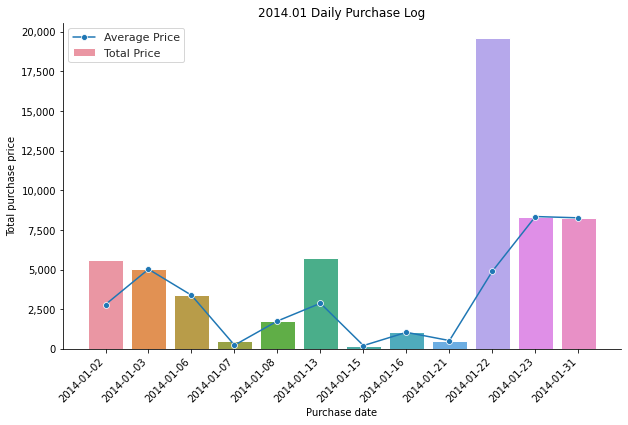

In [ ]:
from matplotlib.legend import legend_handler

def thousands_separators(x, pos):
    return format(int(x), ',')

formatter = FuncFormatter(thousands_separators)

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style = "white")
sns.despine(top = True, right = True) #Remove line of top and right
#Total bar chart
ax = sns.barplot(x='Purchase_Date', y='Total_Price',  data=df_purchase_log_201401, ci=None, label = 'Total Price')
#formatted date string
x_dates = df_purchase_log_201401['Purchase_Date'].dt.strftime('%Y-%m-%d')
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.yaxis.set_major_formatter(formatter)

#Average line chart
sns.lineplot(data=df_purchase_log_201401_count['avg_price'] , marker='o', label='Average Price')
plt.title("2014.01 Daily Purchase Log")
plt.xlabel("Purchase date")
plt.ylabel("Total purchase price")

#set the title of legend figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels, loc='upper left')


彙整每日營收與七日移動平均的Query

In [ ]:
query2 = spark.sql('''
                select 
                 Purchase_Date as dt
                ,count(*) as purchase_count
                --average 7 days 
                ,AVG(SUM(Total_Price))
                 OVER(ORDER BY Purchase_Date ROWS BETWEEN 6 PRECEDING and CURRENT ROW) as seven_day_avg
                --average 7 days strict
                ,CASE WHEN
                  7 = count(*)
                  OVER(ORDER BY Purchase_Date ROWS BETWEEN 6 PRECEDING and CURRENT ROW)
                 THEN
                  AVG(SUM(Total_Price))
                  OVER(ORDER BY Purchase_Date ROWS BETWEEN 6 PRECEDING and CURRENT ROW)
                 END as seven_day_avg_strict
                from vw_ca_purchase_log
                where Purchase_Date between '2014-01-01'
                and '2014-01-31'
                group by dt
                order by dt
              ''')

query2.show()

+-------------------+--------------+------------------+--------------------+
|                 dt|purchase_count|     seven_day_avg|seven_day_avg_strict|
+-------------------+--------------+------------------+--------------------+
|2014-01-02 00:00:00|             2|            5590.3|                null|
|2014-01-03 00:00:00|             1|          5306.345|                null|
|2014-01-06 00:00:00|             1|           4664.43|                null|
|2014-01-07 00:00:00|             2|         3614.2725|                null|
|2014-01-08 00:00:00|             1|          3242.418|                null|
|2014-01-13 00:00:00|             2|           3660.03|                null|
|2014-01-15 00:00:00|             1|3166.3114285714287|  3166.3114285714287|
|2014-01-16 00:00:00|             1|2516.2685714285712|  2516.2685714285712|
|2014-01-21 00:00:00|             1|           1873.07|             1873.07|
|2014-01-22 00:00:00|             4| 4190.431428571428|   4190.431428571428|

計算當月累計營收(2012Q2)

In [ ]:
query2 = spark.sql('''
                select 
                 Purchase_Date as dt
                ,date_format(Purchase_Date,'yyyyMM') as year_month
                ,count(*) as purchase_count
                ,SUM(Total_Price) as total_amount
                ,SUM(SUM(Total_Price))
                 OVER(PARTITION BY cast(date_format(Purchase_Date,'yyyyMM') as varchar(6))
                      ORDER BY Purchase_Date ROWS UNBOUNDED PRECEDING ) as agg_amount
                from vw_ca_purchase_log
                where Purchase_Date  between '2012-04-01'
                and '2012-06-30'
                group by dt
                order by dt
              ''')

df_query2 = query2.toPandas()
df_query2

,dt,year_month,purchase_count,total_amount,agg_amount
0,2012-04-09,201204,1,170.00,170.00
1,2012-05-01,201205,1,395.20,395.20
2,2012-05-10,201205,1,34.00,429.20
3,2012-05-16,201205,1,560.00,989.20
4,2012-06-01,201206,1,2856.00,2856.00
5,2012-06-05,201206,1,3300.00,6156.00
6,2012-06-15,201206,2,15000.00,21156.00
7,2012-06-18,201206,1,6563.28,27719.28
8,2012-06-21,201206,1,26.43,27745.71
9,2012-06-25,201206,1,2396.00,30141.71


透過整月的累計營收趨勢了解每月的營收狀況

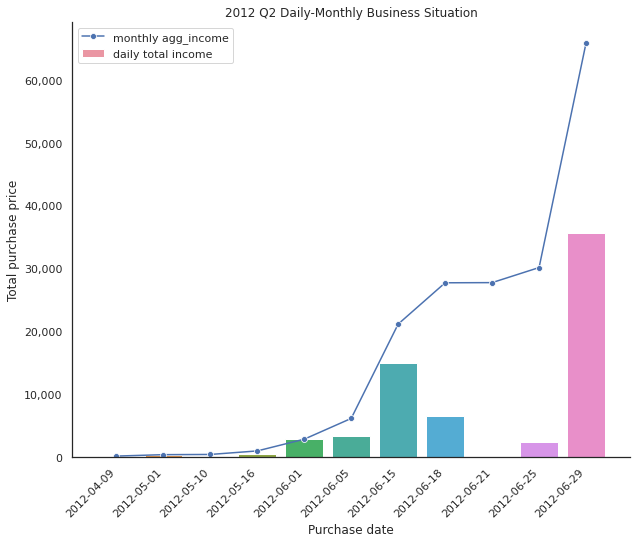

In [ ]:
from matplotlib.legend import legend_handler
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style = "white")
sns.despine(top = True, right = True) #Remove line of top and right
#Total bar chart
ax = sns.barplot(x='dt', y='total_amount',  data=df_query2, ci=None, label = 'daily total income')
#formatted label string 
x_dates = df_query2['dt'].dt.strftime('%Y-%m-%d')
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.yaxis.set_major_formatter(formatter)

#Average line chart
sns.lineplot(data=df_query2['agg_amount'] , marker='o', label='monthly agg_income')
plt.title("2012 Q2 Daily-Monthly Business Situation")
plt.xlabel("Purchase date")
plt.ylabel("Total purchase price")

#set the title of legend figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels, loc='upper left')

每月營收的年成長率

In [ ]:
query3 = spark.sql('''
                WITH daily_purchase as (
                  SELECT 
                    Purchase_Date as dt
                    ,date_format(Purchase_Date,'yyyy') as year
                    ,date_format(Purchase_Date,'MM') as month
                    ,date_format(Purchase_Date,'dd') as day
                    ,SUM(Total_Price) as total_price
                  FROM vw_ca_purchase_log
                  GROUP BY dt
                )
                SELECT 
                  month
                  --COALESCE for changing null to 0
                  ,COALESCE(SUM(CASE year WHEN '2013' THEN CAST(total_price as DECIMAL(10,2)) END), 0) as price_2013
                  ,COALESCE(SUM(CASE year WHEN '2014' THEN CAST(total_price as DECIMAL(10,2)) END), 0) as price_2014
                  ,COALESCE(CAST( SUM(CASE year WHEN '2014' THEN total_price END) /
                                  SUM(CASE year WHEN '2013' THEN total_price END) * 100 as DECIMAL(10,2)), 0) as rate
                FROM 
                  daily_purchase
                GROUP BY month
                ORDER BY month
              ''')
df_query3 = query3.toPandas()
df_query3

,month,price_2013,price_2014,rate
0,01,256818.92,59937.94,23.34
1,02,178813.23,167229.86,93.52
2,03,126283.89,204131.39,161.64
3,04,80745.00,1145328.17,1418.45
4,05,174463.94,5230188.21,2997.86
5,06,202822.04,1442351.08,711.14
6,07,190943.21,663184.35,347.32
7,08,115803.21,1128395.80,974.41
8,09,271158.03,182464.52,67.29
9,10,345677.81,375390.49,108.60


**繪製每月營收年成長圖**

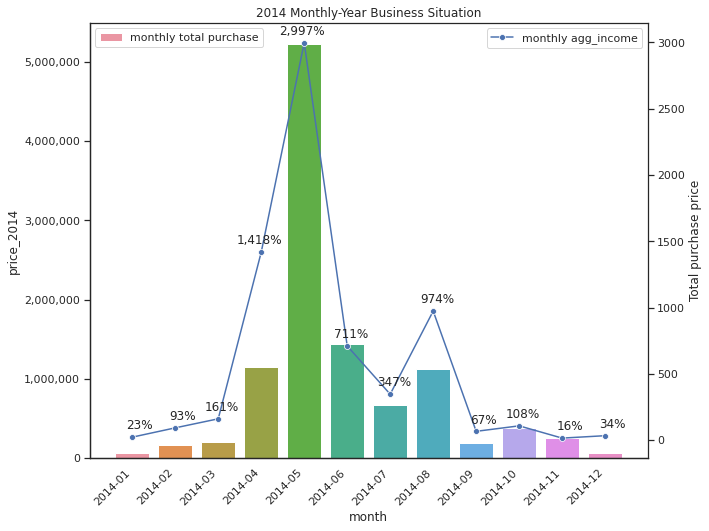

In [ ]:
from matplotlib.legend import legend_handler
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style = "white")
sns.despine(top = True, right = True) #Remove line of top and right
#Total bar chart
ax = sns.barplot(x='month', y='price_2014',  data=df_query3, ci=None, label = 'monthly total purchase')
#formatted label string 
x_dates = '2014-'+df_query3['month']
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.yaxis.set_major_formatter(formatter)

ax2 = ax.twinx()

sns.lineplot(data=df_query3['rate'] , marker='o', label='monthly agg_income', ax=ax2)

for month, rate in zip(df_query3['month'],df_query3['rate']):
  month = int(month)
  ax2.annotate(f'{formatter(rate)}%', xy=(month, rate), textcoords="offset points", xytext=(-22, 8), ha="right")

plt.title("2014 Monthly-Year Business Situation")
plt.xlabel("Purchase Month")
plt.ylabel("Total purchase price")

#set the title of legend figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels, loc='upper left')

ABC Rank: 藉由營收的貢獻度將商品分成不同等級
Rank A: 前面0~70%
Rank B: 70% ~ 90%
Rank C: 90% ~ 100%

Fan chart建立時應注意的重點：「採取哪個時間點的銷售額作為基準」。此會影響判讀成長或衰退趨勢的結果。

In [ ]:
query4 = spark.sql('''
                WITH monthly_sales as (
                  SELECT 
                    Item_Name
                    --計算各類別營收
                   ,SUM(Total_Price) as amount
                  FROM vw_ca_purchase_log
                  WHERE Purchase_Date  BETWEEN '2013-01-01'
                    AND '2013-03-31'
                  GROUP BY Item_Name
                )
                , sales_composition_ratio AS (
                  SELECT
                     Item_Name
                   , cast(amount as decimal(10,2)) as amount
                   --所占百分比：100.0 * 類別營收 / 全體營收
                   , cast(100.0 * amount/SUM(amount) OVER() as decimal(10,2)) as composition_ratio
                   --累計百分比：100.0 * 類別累計營收 / 全體營收
                   , cast(100.0 * SUM(amount) OVER(ORDER BY amount DESC)
                     / SUM(amount) OVER() as decimal(10, 2)) AS cumulative_ratio
                  FROM monthly_sales
                )
                SELECT * 
                , CASE
                    WHEN cumulative_ratio BETWEEN 0  AND 70  THEN 'A'
                    WHEN cumulative_ratio BETWEEN 70 AND 90  THEN 'B'
                    WHEN cumulative_ratio BETWEEN 90 AND 100 THEN 'C'
                  END as abc_rank
                FROM sales_composition_ratio
                ORDER BY amount DESC
              ''')
query4.show(truncate = False)
df_query4 = query4.toPandas()

+-------------+---------+-----------------+----------------+--------+
|Item_Name    |amount   |composition_ratio|cumulative_ratio|abc_rank|
+-------------+---------+-----------------+----------------+--------+
|Food         |227977.20|40.57            |40.57           |A       |
|SHEETING     |199172.20|35.45            |76.02           |B       |
|Stationery   |47908.04 |8.53             |84.54           |B       |
|WASH SAND    |37320.00 |6.64             |91.18           |C       |
|Hardware     |35452.86 |6.31             |97.49           |C       |
|Legal Service|4695.46  |0.84             |98.33           |C       |
|LBR          |4630.00  |0.82             |99.15           |C       |
|Reagents     |4576.68  |0.81             |99.97           |C       |
|Entertainment|183.60   |0.03             |100.00          |C       |
+-------------+---------+-----------------+----------------+--------+



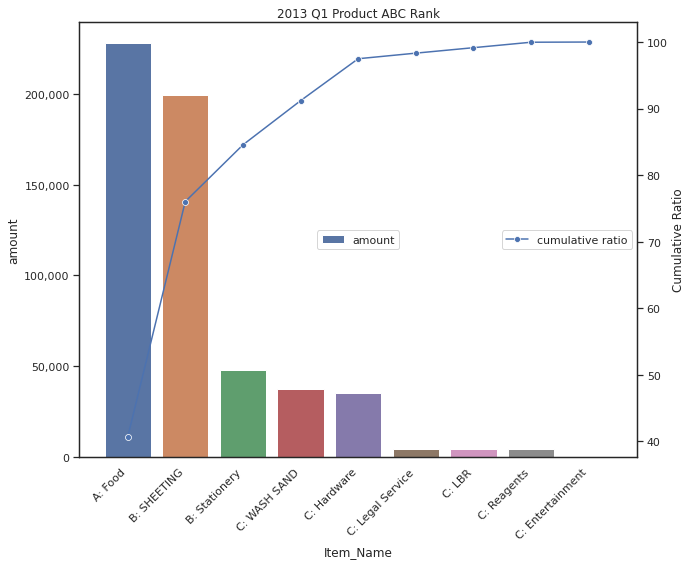

In [ ]:
from matplotlib.legend import legend_handler
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style = "white")
#Total bar chart
ax = sns.barplot(x='Item_Name', y='amount',  data=df_query4, ci=None, label = 'amount')
#formatted label string 
x_items = df_query4['abc_rank'] + ": "+ df_query4['Item_Name']
ax.set_xticklabels(labels=x_items, rotation=45, ha='right')
ax.yaxis.set_major_formatter(formatter)

ax2 = ax.twinx()
sns.lineplot(data=df_query4['cumulative_ratio'] , marker='o', label='cumulative ratio', ax=ax2)

plt.title("2013 Q1 Product ABC Rank")
plt.xlabel("Item Name")
plt.ylabel("Cumulative Ratio")

#set the title of legend figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels, loc='center')
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(labels2, loc='center right')

### Fan Chart

判讀商品銷售成長率

建立Fan Chart應注意的重點：

**採取哪個時間點的銷售額作為基準，
會大幅影響成長或衰退趨勢的判讀。**

In [ ]:
query5 = spark.sql('''
                WITH daily_category_amount as (
                  SELECT 
                     Purchase_Date as dt
                    ,Item_Name as category
                    ,date_format(Purchase_Date,'yyyy') as year
                    ,date_format(Purchase_Date,'MM') as month
                    ,date_format(Purchase_Date,'dd') as day
                    ,SUM(Total_Price) as amount
                  FROM vw_ca_purchase_log
                  WHERE Purchase_Date  BETWEEN '2013-01-01'
                    AND '2013-03-31'
                  GROUP BY dt, category
                )
                , monthly_category_amount as (
                  SELECT 
                    concat(year, '-', month) as year_month
                    , category
                    , cast(SUM(amount) as decimal(10,2)) as amount
                  FROM daily_category_amount
                  GROUP BY year, month, category
                )
                SELECT 
                      year_month
                    , category
                    , amount
                    , cast(FIRST_VALUE(amount)
                             OVER (PARTITION BY category ORDER BY year_month, category ROWS UNBOUNDED PRECEDING)
                             as decimal(10,2)) 
                      as base_amount
                    , cast (100.0 * amount
                      / FIRST_VALUE(amount)
                             OVER (PARTITION BY category ORDER BY year_month, category ROWS UNBOUNDED PRECEDING)
                             as decimal(10,2)) 
                      as rate
                FROM monthly_category_amount
                ORDER BY year_month, category DESC
              ''')

df_query5 = query5.toPandas()
df_query5

,year_month,category,amount,base_amount,rate
0,2013-01,SHEETING,199172.20,199172.20,100.00
1,2013-01,Reagents,4576.68,4576.68,100.00
2,2013-01,LBR,4630.00,4630.00,100.00
3,2013-01,Hardware,16184.45,16184.45,100.00
4,2013-01,Food,32071.99,32071.99,100.00
5,2013-01,Entertainment,183.60,183.60,100.00
6,2013-02,WASH SAND,37320.00,37320.00,100.00
7,2013-02,Stationery,8420.54,8420.54,100.00
8,2013-02,Legal Service,4695.46,4695.46,100.00
9,2013-02,Hardware,255.00,16184.45,1.58


Hardware, Stationery, Food都有大幅的成長

其中以Stationery的成長幅度最大

Text(0, 0.5, 'Products Growth Rate')

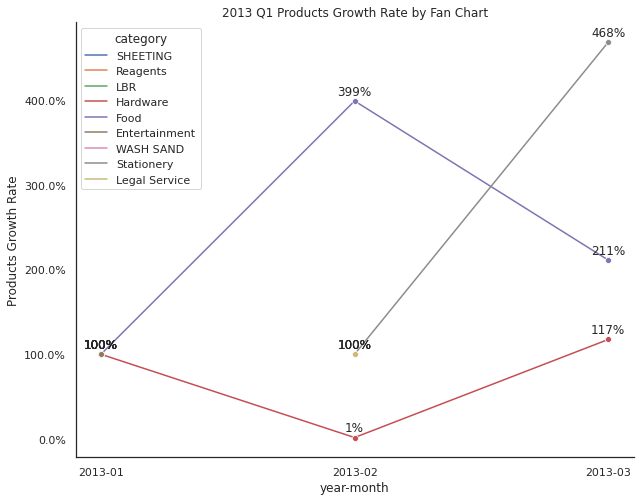

In [ ]:
from matplotlib.legend import legend_handler
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style = "white")
sns.despine(top = True, right = True) #Remove line of top and right
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 100, decimals = 1))
sns.lineplot(x="year_month", y="rate", hue="category", marker='o', data=df_query5)

for year_month, rate in zip(df_query5['year_month'], df_query5['rate']):
  year_month = str(year_month)
  ax.annotate(f'{formatter(rate)}%', xy=(year_month, rate), textcoords="offset points", xytext=(0, 6), ha="center")

plt.title("2013 Q1 Products Growth Rate by Fan Chart")
plt.xlabel("year-month")
plt.ylabel("Products Growth Rate")
